# High Dimensional Probability and Concentration of Measure

Machine Learning Fundamentals for Economists

Jesse Perla (University of British Columbia)

# Overview

## Summary

-   High-dimensional spaces exhibit counterintuitive geometric and
    probabilistic properties
-   Key phenomena:
    -   **Curse of dimensionality**: most volume is in corners, uniform
        sampling fails
    -   **Concentration of measure**: functions of many variables are
        “essentially constant”
    -   **Johnson-Lindenstrauss**: random projections preserve distances
    -   **Near-orthogonality**: random vectors are almost perpendicular
    -   **Random algorithms**: leverage concentration to provide
        probabilistic error guarantees
-   These concepts are foundational for understanding why ML methods
    work
-   Applications to solving structural economic models covered in
    [subsequent lecture](solving_equilibrium_problems.qmd)

## References

-   Primary reference: @vershynin2018high
-   Concentration inequalities: @boucheron2013concentration
-   Classic reference: @ledoux2001concentration

# High-Dimensional Geometry

## Hypercubes Are All Corners

-   Counter-intuitive geometry: **in high-dimensions, hypercubes are all
    corners**
-   Consider volume within a 1/2 radius of the origin in a hypercube
    $[-1/2,1/2]^N$
    -   Hypersphere inscribed in hypercube, touching all “faces” for all
        $N$
    -   $V(1) = 1$. The origin is close to every point on the line
        segment.
    -   $V(2) = \pi (1/2)^2, V(3) = \frac{4}{3} \pi (1/2)^3, V(10)\approx 0.002, V(50) = 1.536743\times 10^{-28}$

    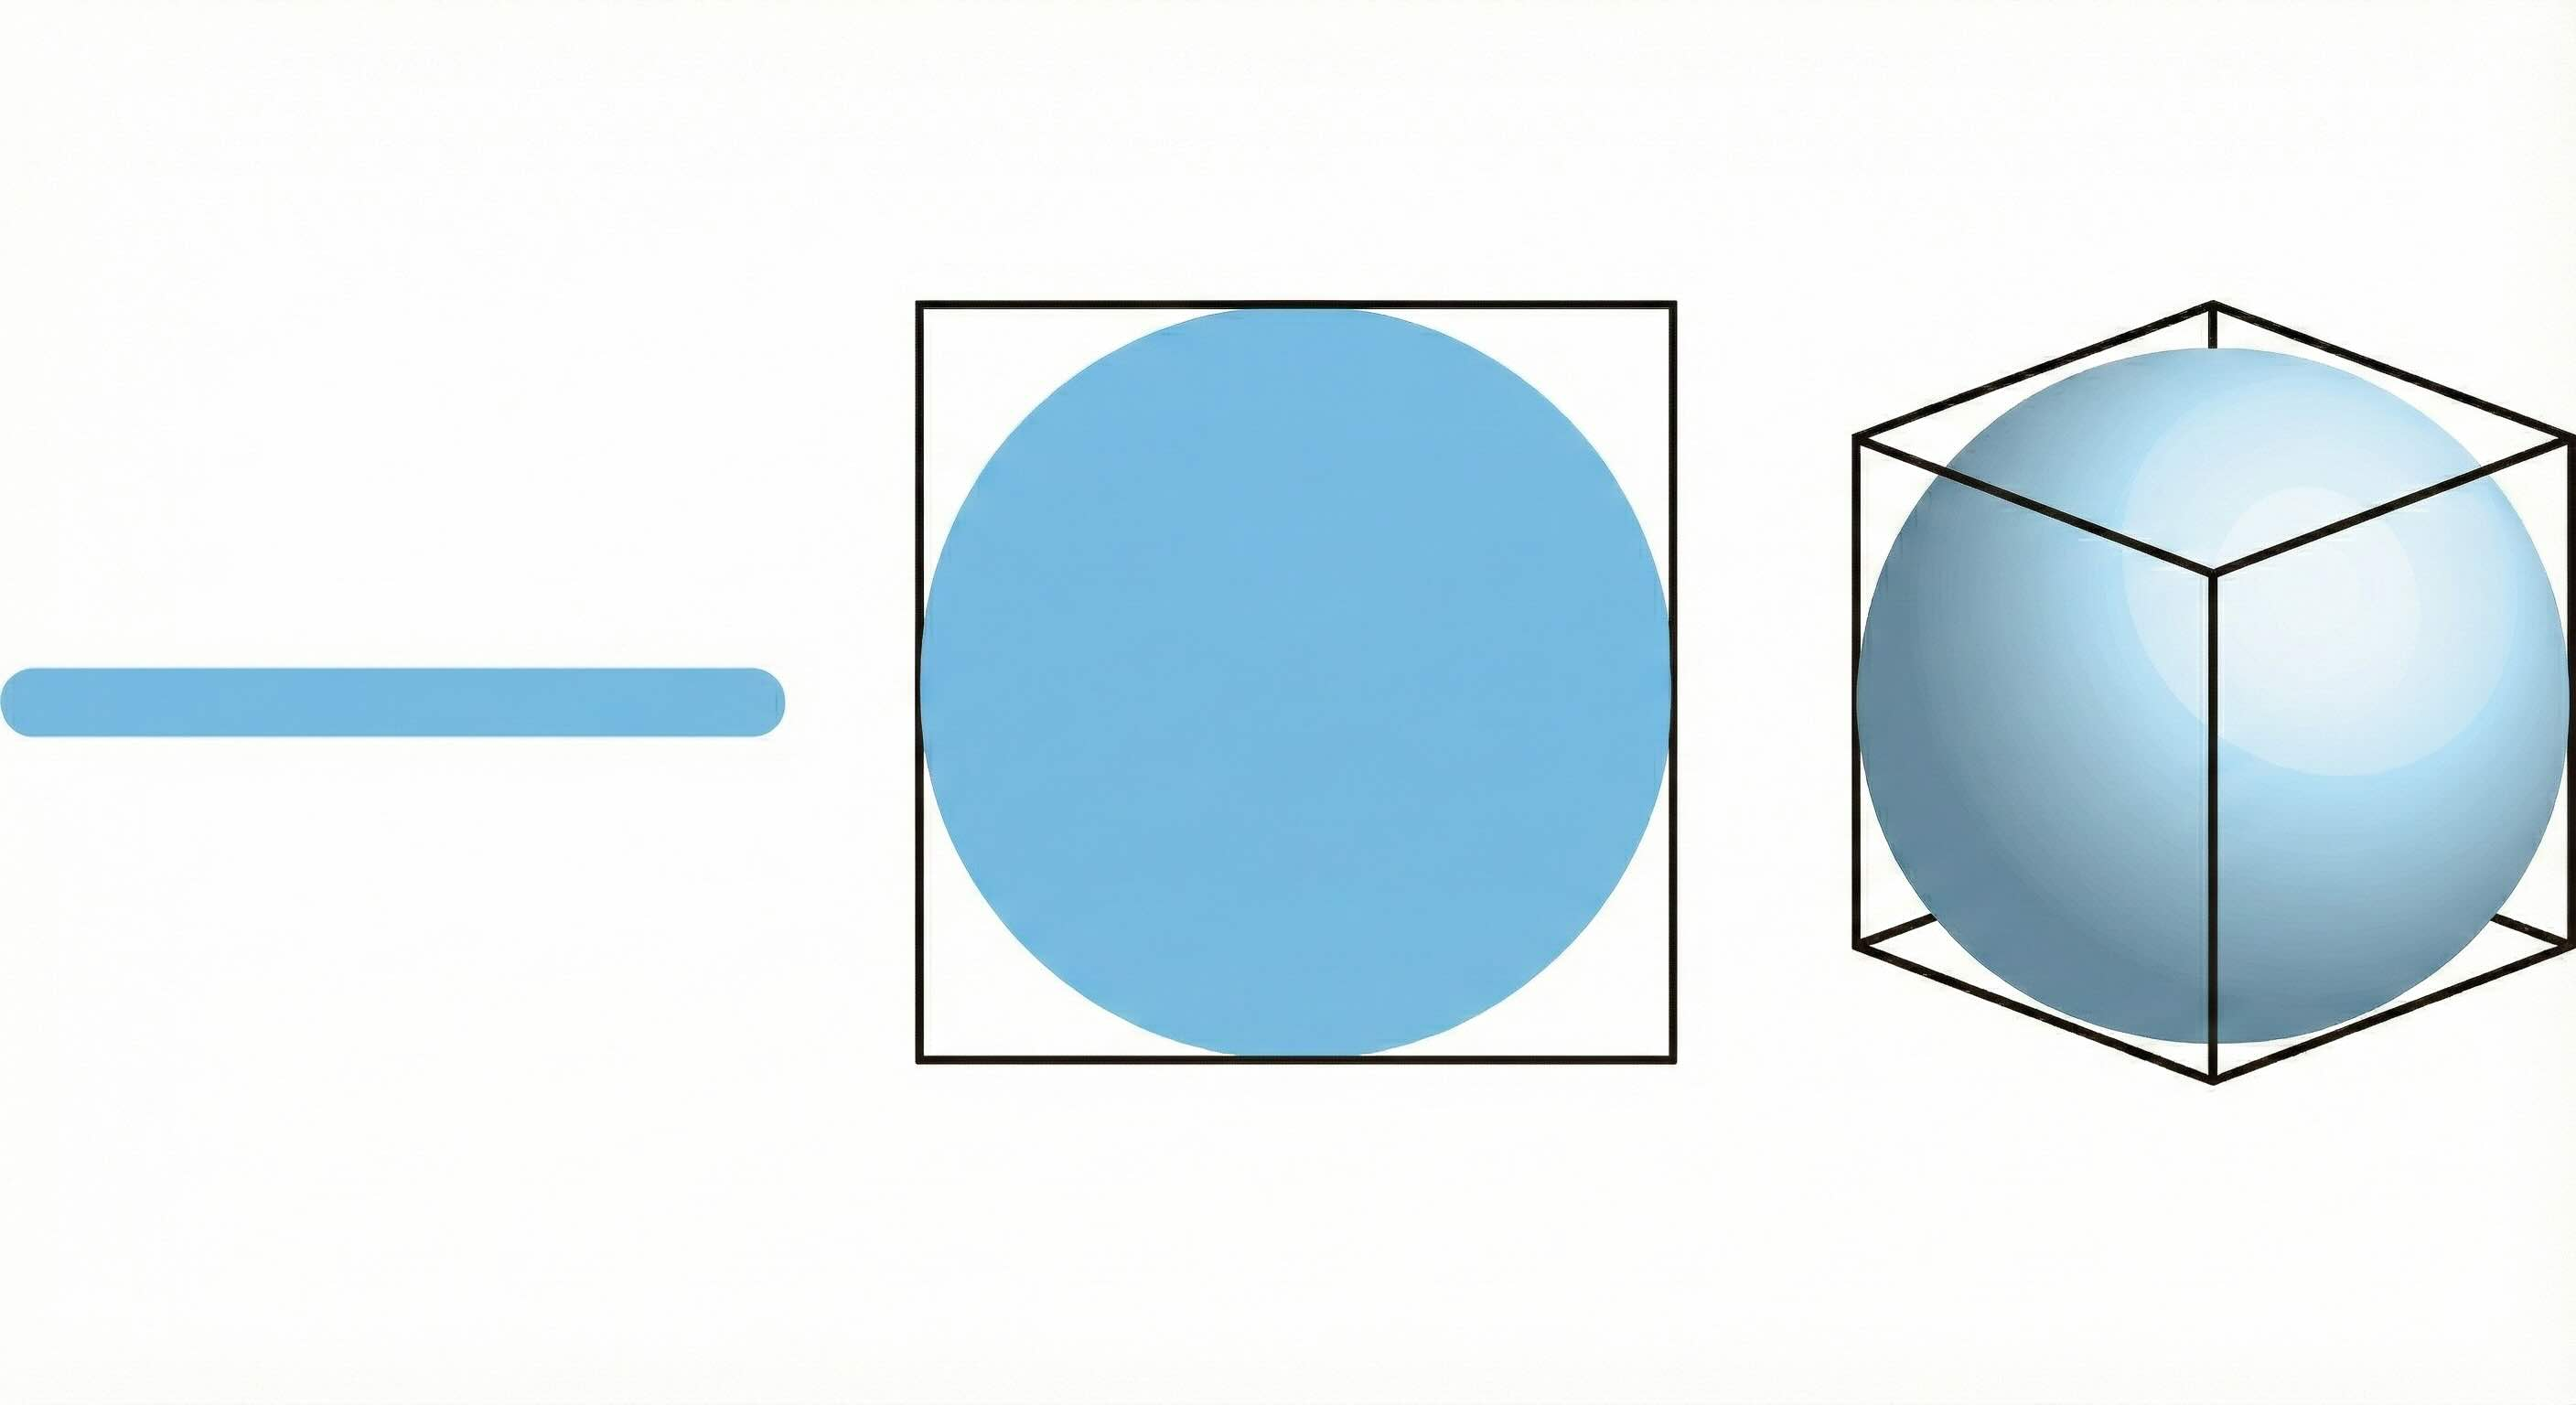

-   Largest possible sphere is vanishingly small!
-   I think it touches $N 2^{N-1}$ edges for $N > 1$

## A High-Dimensional Space is a Lonely Place (Bernhard Schölkopf)

-   Any $X$ (e.g., steady-state) becomes increasingly distant from other
    regions of ${\mathcal{X}}$
-   Approximating functions with a grid or sampled on uniform
    $[X_{\min}, X_{\max}]^N$ distribution
    -   Almost all of the volume in high-dimensional spaces is where you
        do not need it
    -   i.e., not only does the num grid points, $M$, need to increase
        exponentially with $N$, but asymptotically **almost every point
        is wasted** for many applications
    -   Calculating numerical expectations has similar issues (see
        @betancourt2018probabilistic)
-   How could these possibly generalize from ${\mathcal{D}}$ to
    ${\mathcal{X}}$? Is it really so hopeless?
    -   ML and deep learning methods succeed in approximating functions
        on even richer spaces (e.g., images, videos, and NLP). Same with
        Bayesian methods like HMC.
    -   Krusell-Smith approximations work very well in practice for many
        problems

-   Similarly, how could you possibly calculate expectations? Most
    points in $W_s$ would be in corners as well?
-   Nearest neighbor becomes meaningless. The natural measure of
    distances is closer to a sliver in the right direction than to a
    ball.

# High Dimensional Probability

## Minimizing Uniform vs. Population Risk

-   **Uniform bounds on Errors**: impossible in general without
    exponential cost in $N$ $$
    \min_{f\in {\mathcal{F}}}\sup_{(x,y) \in {\mathcal{X}}} \left[(f(x) - y)^2\right]
    $$

-   **Statistical learning**: minimizes regions weighted by a
    distribution $\mu^*$

    $$
    \min_{f \in {\mathcal{F}}} \mathbb{E}_{(x,y) \sim \mu^*}\left[(f(x) - y)^2\right]
    $$

    -   Helps if probability distribution is “concentrated” in specific
        regions of ${\mathcal{X}}$
    -   Doesn’t help doesn’t if $\mu^*$ is itself “all corners” (e.g.,
        uniformly distributed)
    -   Challenging if “worst case” matters (e.g., game with
        unconstrained best-responses)

## Concentration of Measure Phenomenon

*“A random variable that depends in a Lipschitz way on many independent
variables (but not too much on any of them) is essentially constant.”*
(@ledoux2001concentration)

-   i.e., functions of high-dimensional random variables have small
    variance if
    -   The correlation between individual random variables are
        controlled
    -   Lipshitz-like: If no single coordinate dominates, the function
        “averages out”
-   **Non-asymptotic bounds** that improve with dimension (i.e., larger
    $N$ is better, not worse)
-   While geometry in ${\mathcal{X}}$ may be subject to a curse of
    dimensionality, functions of random variables on that space can
    become increasingly predictable

## Example: Norm of Isotropic Gaussian

-   Let $X \sim \mathcal{N}(0_N, I_N)$ be an $N$-dimensional standard
    Gaussian
-   Consider $f(X) = \|X\|_2 / \sqrt{N}$
-   Can prove the concentration bound:

$$
{\mathbb{P}_{}\left( {|f(X) - 1| \geq \epsilon} \right)} \leq \exp(-c \epsilon^2 N)
$$

for some constant $c > 0$ independent of $N$.

-   The ratio $\|X\|_2 / \sqrt{N}$ becomes increasingly predictable as
    $N$ grows
-   Convergence is **exponentially fast** in $N$. Blessing, not curse,
    of dimensionality!

## Visualization of Concentration of Norms

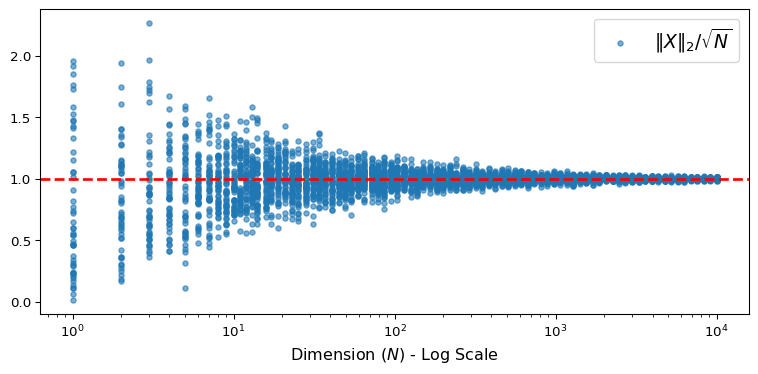

-   50 draws of $X \sim \mathcal{N}(0_N, I_N)$ for each dimension $N$
-   As $N$ increases, all samples concentrate tightly around 1

## The Soap Bubble Effect

<figure>
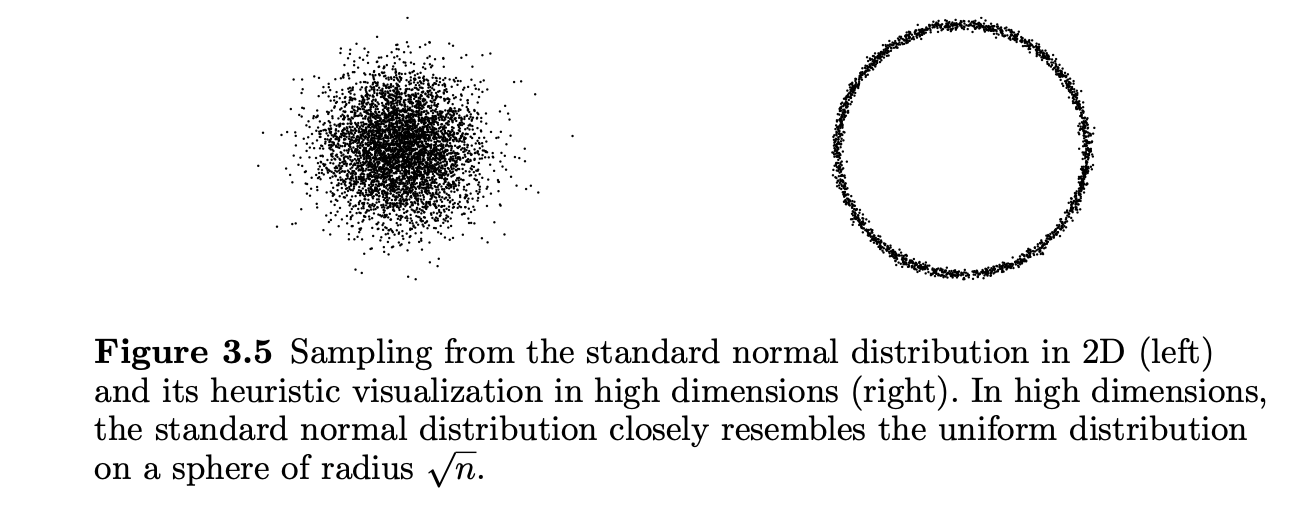
<figcaption aria-hidden="true">From <span class="citation"
data-cites="vershynin2018high">@vershynin2018high</span>: 2D Gaussian
samples vs. random 2D projections of high-dimensional
samples</figcaption>
</figure>

-   2D Gaussians are distributed around the origin with an intuitive
    **peak**
-   High-dim Gaussians are distributed roughly uniformly on a
    **spherical shell** of radius $\sqrt{N}$
-   Points are nowhere near the mode/mean/median (i.e., $X = 0_N$)

## Lipschitz Concentration (Informal)

> **Definition: Lipschitz Function**
>
> A function $f: {\mathbb{R}}^N \to {\mathbb{R}}$ is **$L$-Lipschitz**
> if for all $x, y \in {\mathbb{R}}^N$:
>
> $$
> |f(x) - f(y)| \leq L \|x - y\|_2
> $$

-   Lipschitz functions cannot change too fast
-   For $f(x) = \|x\|_2$, we have $L = 1$
-   Key insight: Lipschitz functions of Gaussians concentrate around
    their mean
-   Can be extended to non-Lipschitz functions bounding expected
    gradients, etc.

## Gaussian Concentration Inequality

> **Proposition: Concentration for Lipschitz Functions of Gaussians**
>
> Let $X \sim \mathcal{N}(0_N, I_N)$ and let
> $f: {\mathbb{R}}^N \to {\mathbb{R}}$ be $L$-Lipschitz. Then:
>
> $$
> {\mathbb{P}_{}\left( {|f(X) - \mathbb{E}[f(X)]| \geq t} \right)} \leq 2\exp\left(-\frac{t^2}{2L^2}\right)
> $$

-   The bound is **independent of dimension** $N$!
-   For normalized functions (gradient $\mathrm{O}(1/\sqrt{N})$),
    concentration improves with $N$
    -   i.e., approximate average output of an industry vs. total output
        of an industry
-   Many extensions: bounded differences, sub-Gaussian tails, etc.
    (@boucheron2013concentration)

# When Concentration Fails

## Breaking Concentration: Three Mechanisms

The Gaussian concentration inequality requires:

1.  **Isotropic covariance**: $X \sim \mathcal{N}(0, I_N)$
2.  **Lipschitz function**: bounded gradient $\|\nabla f\| \leq L$
3.  **Distributed dependence**: function doesn’t rely too heavily on any
    single coordinate

Violating (1) or (2) can **break concentration**, while violating (3)
**prevents improvement** with dimension.

------------------------------------------------------------------------

## Non-Isotropic Gaussians: The Setup

-   Consider $Z \sim \mathcal{N}(0, \Sigma)$ with general covariance
    $\Sigma$

-   Write $Z = \Sigma^{1/2} X$ where $X \sim \mathcal{N}(0, I_N)$

-   For an $L$-Lipschitz function $f$, define $g(X) = f(\Sigma^{1/2} X)$

    $$
    |g(x) - g(y)| = |f(\Sigma^{1/2} x) - f(\Sigma^{1/2} y)| \leq L \|\Sigma^{1/2}(x-y)\|_2
    $$

-   Using operator norm:
    $\|\Sigma^{1/2}(x-y)\|_2 \leq \|\Sigma^{1/2}\|_{op} \|x-y\|_2 = \sqrt{\lambda_{\max}(\Sigma)} \|x-y\|_2$

------------------------------------------------------------------------

## Concentration with Non-Isotropic Gaussian

> **Proposition: Non-Isotropic Gaussian Concentration**
>
> For $Z \sim \mathcal{N}(0, \Sigma)$ and
> $f: {\mathbb{R}}^N \to {\mathbb{R}}$ that is $L$-Lipschitz:
>
> $$
> {\mathbb{P}_{}\left( {|f(Z) - \mathbb{E}[f(Z)]| \geq t} \right)} \leq 2\exp\left(-\frac{t^2}{2L^2 \lambda_{\max}(\Sigma)}\right)
> $$

-   The **effective Lipschitz constant** is
    $L \sqrt{\lambda_{\max}(\Sigma)}$
-   Concentration depends on the **largest eigenvalue** of the
    covariance
-   If $\lambda_{\max}(\Sigma)$ grows with $N$, concentration can
    **degrade** with dimension

------------------------------------------------------------------------

## Perfect Correlation Breaks Concentration

-   Consider **equicorrelation**:
    $\Sigma = \sigma^2\left((1-\rho)I_N + \rho \mathbf{1}_N \mathbf{1}_N^\top\right)$
    -   Diagonal: $\Sigma_{ii} = \sigma^2$ (each variable has variance
        $\sigma^2$)
    -   Off-diagonal: $\Sigma_{ij} = \sigma^2 \rho$ (correlation $\rho$
        between all pairs)
-   **Eigenvalues**:
    -   $\sigma^2(1-\rho)$ with multiplicity $N-1$
    -   $\sigma^2(1 + (N-1)\rho)$ with multiplicity $1$
-   As $\rho \to 1$: $\lambda_{\max}(\Sigma) \to \sigma^2 N$

------------------------------------------------------------------------

## Perfect Correlation: The Bound Degrades

-   With $\lambda_{\max}(\Sigma) = \sigma^2 N$, the concentration bound
    becomes:

    $$
    {\mathbb{P}_{}\left( {|f(Z) - \mathbb{E}[f(Z)]| \geq t} \right)} \leq 2\exp\left(-\frac{t^2}{2L^2 \sigma^2 N}\right)
    $$

-   **Concentration gets worse with dimension!**

-   **Intuition**: With perfect correlation, all $N$ variables move
    together

    -   Effectively have only **one degree of freedom**, not $N$
    -   No “averaging out” across independent sources of variation

-   This is why independence (or weak dependence) is crucial for
    concentration

------------------------------------------------------------------------

## Functions of Single Coordinates

-   Consider $f(X) = X_1$ with $X \sim \mathcal{N}(0, I_N)$

-   Gradient: $\nabla f = (1, 0, \ldots, 0)^\top$, so $L = 1$

-   Concentration bound:

    $$
    {\mathbb{P}_{}\left( {|X_1| \geq t} \right)} \leq 2e^{-t^2/2}
    $$

-   **No improvement with dimension!** The bound is the same for
    $N = 10$ or $N = 10{,}000$

-   $X_1 \sim \mathcal{N}(0, 1)$ regardless of $N$—adding more
    coordinates doesn’t help

------------------------------------------------------------------------

## Contrast: Sample Mean Concentrates

-   Compare with $\bar{X} = \frac{1}{N}\sum_{i=1}^N X_i$

-   Gradient: $\nabla \bar{X} = \frac{1}{N}(1, 1, \ldots, 1)^\top$

-   Lipschitz constant: $L = \|\nabla \bar{X}\|_2 = \frac{1}{\sqrt{N}}$

-   Concentration bound:

    $$
    {\mathbb{P}_{}\left( {|\bar{X}| \geq t} \right)} \leq 2\exp\left(-\frac{t^2 N}{2}\right)
    $$

-   **Improves with dimension!** Exponentially tighter as $N$ grows

-   $\bar{X} \sim \mathcal{N}(0, 1/N)$: variance shrinks as $1/N$

------------------------------------------------------------------------

## Key Insight: Coordinate Dependence

> **When Does Concentration Improve with $N$?**
>
> Concentration improves with dimension when **no single coordinate
> dominates**:
>
> -   $\partial f / \partial X_i = \mathrm{O}(1/\sqrt{N})$ for all $i$ →
>     concentration improves
> -   $\partial f / \partial X_1 = \mathrm{O}(1)$, others $\approx 0$ →
>     no improvement

-   **Intuition**: The function must “average out” across many
    coordinates
-   Functions that depend on all coordinates roughly equally benefit
    from high dimensions
-   Functions concentrated on few coordinates behave like
    low-dimensional problems

# Concentration is a Double-Edged Sword

## Shifted Mean: Increasing Separation

-   Consider two distributions: $\mathcal{N}(0_N, I_N)$
    vs. $\mathcal{N}(\epsilon \cdot \mathbf{1}_N, I_N)$
-   The Euclidean distance between means is $\epsilon \sqrt{N}$
-   As $N$ grows, distributions separate completely despite small
    per-coordinate shift
    -   Showing random 2D projections from $4000$ sampled points for
        visualization

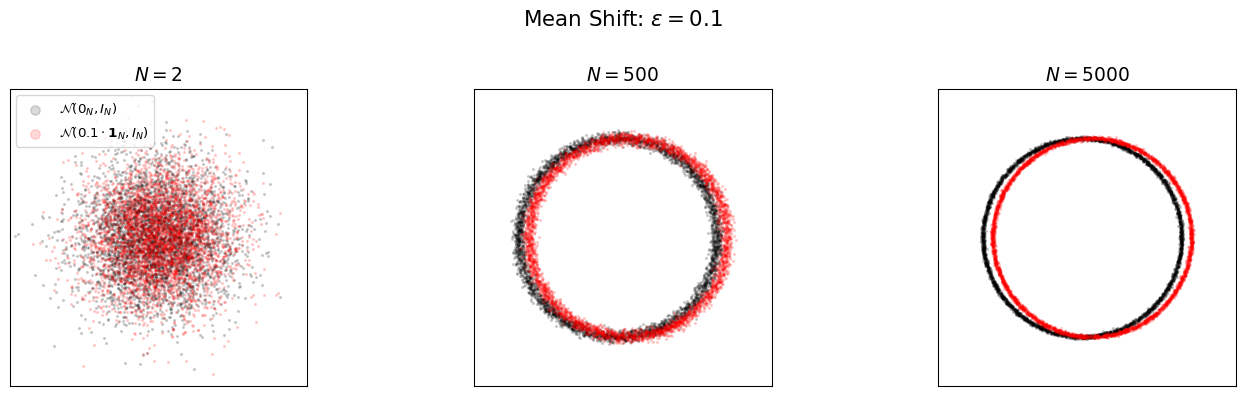

## Variance Shift: Dangerous and Difficult to Detect

-   Consider: $\mathcal{N}(0_N, I_N)$
    vs. $\mathcal{N}(0_N, (1 + \epsilon) I_N)$
-   A 5% variance increase causes complete separation in high dimensions
    -   Sampling more points from a slightly misspecified distribution
        may make statistical learning worse, not better.

/tmp/ipykernel_4572/574386568.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()

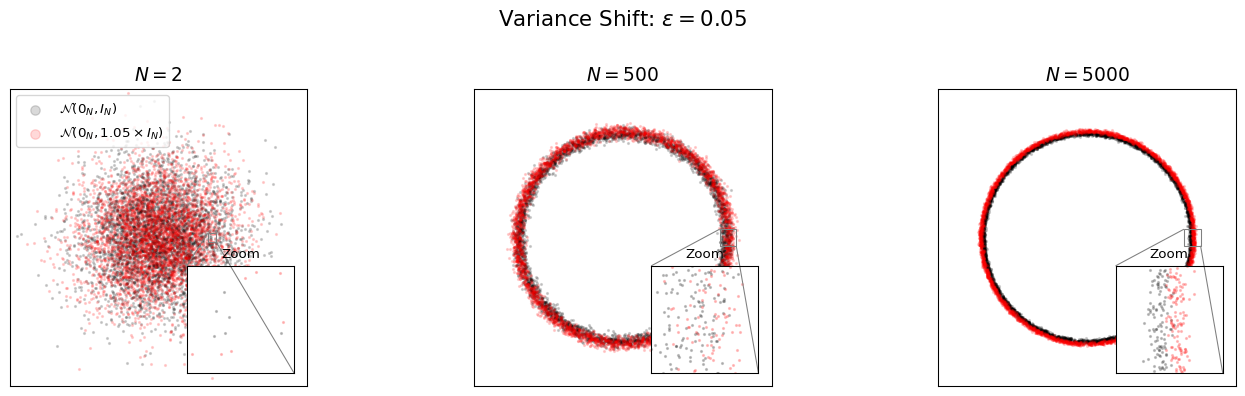

## Marginals Are Deceptive

-   With the shifted variance, the marginal distribution of any single
    coordinate is **similar** for both distributions
    -   Showing the empirical 1D marginals of $x_1$ from $4000$ samples
-   Recall that the joint distributions are completely separated in high
    dimensions

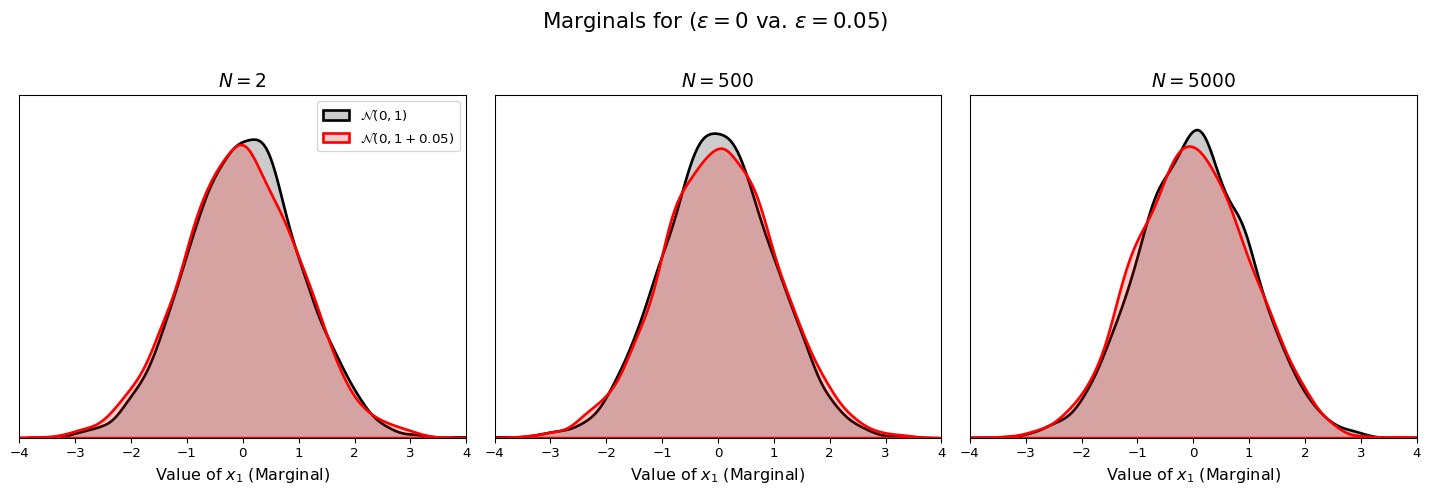

## Key Insight: Double-Edged Sword

-   **Within a distribution**: Concentration is helpful
    -   Functions become predictable
    -   Few samples may suffice for accurate estimation
-   **Across distributions**: Concentration is dangerous
    -   Small changes in distribution parameters cause complete
        separation
    -   A model trained on one distribution may fail entirely on a
        slightly different one
-   **Implication for learning**:
    -   Must ensure training distribution ${\mathcal{D}}\sim \mu^*$
        matches test distribution
    -   “Out of distribution” generalization is fundamentally hard and
        requires changes to the training algorithm.
    -   Representation learning becomes especially important. e.g., if
        functions were summarized well-approximated by mean and variance
        they could be learned and generalize well.

# Random Algorithms in High Dimensions

## Motivation

-   High-dimensional economic models often involve objects that are:
    -   Too large to store explicitly (e.g., large design or transition
        matrices)
    -   Too costly to evaluate deterministically (e.g., integrals over
        $\mathbb{R}^{100}$ or OLS with two-way fixed effects with
        millions of observations)
-   **Random algorithms** use carefully designed randomness to:
    -   Control approximation error probabilistically
    -   Replace exponential complexity with polynomial or logarithmic
        complexity
-   These are not heuristics—they satisfy **non-asymptotic error
    bounds**:
    -   $\mathbb{P}(|\text{Error}| > \epsilon) \le \delta$ where
        $\delta$ includes functions of the number of samples, lipshitz
        constants, etc. Often decreasing, rather than increasing, in
        dimension $N$
    -   Justified by **concentration of measure**

------------------------------------------------------------------------

## Johnson–Lindenstrauss as a Guiding Principle

> **Proposition: Johnson–Lindenstrauss (JL) Lemma**
>
> For any $\epsilon \in (0,1)$, $\delta \in (0,1)$, and points
> $\{x_1,\dots,x_M\}\subset\mathbb{R}^N$, let
> $R \in \mathbb{R}^{k \times N}$ be a random matrix (e.g., Gaussian or
> Rademacher entries) scaled by $1/\sqrt{k}$. If
>
> $$
> k = \mathrm{O}\left(\epsilon^{-2} \log(M^2/\delta)\right),
> $$
>
> then with probability at least $1-\delta$, for all $i,j$:
>
> $$
> (1-\epsilon)\|x_i-x_j\|_2^2
> \;\le\;
> \|R x_i - R x_j\|_2^2
> \;\le\;
> (1+\epsilon)\|x_i-x_j\|_2^2.
> $$

-   **Key insight**: Randomness can preserve structure (i.e., geometry
    as captured by norms/similarity) **uniformly** over many objects
-   JL provides a paradigm for probabilistic error control in random
    algorithms
-   Other random algorithms share the same concentration foundation, but
    operate in different regimes of estimating functionals
    vs. preserving geometry

------------------------------------------------------------------------

## Why Does $k$ Depend on $M$, Not $N$?

-   The projection dimension $k$ depends on **how many distances** to
    preserve, not original dimension
-   **With 2 points**: only 1 distance to preserve
    -   Can project to $k = \mathrm{O}(\epsilon^{-2})$ dimensions
    -   A single projected distance concentrates around the true
        distance
-   **With $M$ points**: must preserve $\binom{M}{2} = \mathrm{O}(M^2)$
    distances **simultaneously**
    -   Need $k = \mathrm{O}(\epsilon^{-2} \log(M^2/\delta))$ for all to
        hold with failure probability at most $\delta$
    -   The $\log M$ factor comes from a union bound over all pairs

------------------------------------------------------------------------

## Why Random Projections Work: The Math

-   Each individual distance concentrates:

    $$
    {\mathbb{P}_{}\left( {\left|\|Rx\|_2^2 - \|x\|_2^2\right| > \epsilon \|x\|_2^2} \right)} \lesssim e^{-c \epsilon^2 k}
    $$

-   **Union bound** over $\mathrm{O}(M^2)$ pairs: multiply failure
    probability by $M^2$

-   To keep total failure $\leq \delta$: need
    $e^{-c\epsilon^2 k} \cdot M^2 \leq \delta$

-   Solving:
    $k \gtrsim \epsilon^{-2}(2\log M + \log(1/\delta)) = \epsilon^{-2} \log(M^2/\delta)$

-   **Dimension $N$ appears nowhere!** Randomness “averages out” across
    all $N$ coordinates

------------------------------------------------------------------------

## JL Preserves Fixed Sets, Not New Points

> **Important Limitation**
>
> JL preserves distances **among a fixed set** of points
> $\{x_1, \ldots, x_M\}$.
>
> It provides no guarantee for distances involving a **new point**
> $x_{M+1}$.

-   A new point would require either:
    -   A fresh random projection, or
    -   Adding it to the set and increasing $k$ accordingly
-   **Implication**: JL is ideal for **static datasets**, less so for
    streaming/online settings
-   For adaptively chosen points, different techniques are needed (e.g.,
    oblivious subspace embeddings)

------------------------------------------------------------------------

## A Taxonomy of Concentration-Based Random Algorithms

| Algorithm type | What is preserved | Economic application |
|---------------------|-----------------------|----------------------------|
| **JL / Random Projections** | Pairwise geometry / inner products | High-dimensional moment inequalities |
| **Hutchinson Trace** | Spectral trace / quadratic forms | Variance decomposition |
| **Randomized SVD / Sketching** | Low-rank structure | Factor models, macro-finance |
| **Stochastic Trace Estimation** | Operator traces | Continuous-time asset pricing |

We now look at canonical economic applications.

------------------------------------------------------------------------

## Application: @kline2020leave

-   **Goal**: Decompose wage variance into worker and firm components
-   **Variance component**: For coefficient vector $\beta$, estimate
    $\theta = \beta^{\top} A \beta$
    -   Matrix $A$ selects which component (e.g., worker effects, firm
        effects, covariance)
-   **Key matrices**:
    -   Projection matrix: $P = X(X^{\top}X)^{-1}X^{\top}$ (leverages
        $P_{ii}$ for leave-out corrections)
    -   Bias correction: $B = (X^{\top}X)^{-1} A$ (combines design with
        component selector)
-   **Challenge**: $P$ and $B$ are massive - cannot form explicitly

## @kline2020leave: Why Traces?

-   The naive plug-in $\hat{\theta} = \hat{\beta}^{\top} A \hat{\beta}$
    is biased:

$$
\mathbb{E}[\hat{\beta}^{\top} A \hat{\beta}] = \beta^{\top} A \beta + \sigma^2 \cdot \mathrm{Tr}(B)
$$

-   To debias: estimate $\mathrm{Tr}(B)$ via Hutchinson’s trick with
    Rademacher vectors $z_j \in \{\pm1\}^N$:

    $$
    \mathrm{Tr}(B) = \mathbb{E}_{z}[z^\top B z] \approx \frac{1}{m}\sum_{j=1}^m z_j^\top (B z_j)
    $$

    -   Only need one linear solve of $(X^{\top}X) (B z) = A z$ for
        $B z$ per draw $z$.
    -   No explicit matrix required. Use preconditioned iterative
        solvers for high-dimensional design matrices (see [iterative
        methods](./iterative_methods.qmd) for more)

## Application: Continuous-Time Asset Pricing and Stochastic Trace

-   Consider a high-dimensional diffusion on state
    $X_t \in \mathbb{R}^N$:

    $$
      dX_t = \mu(X_t)\,dt + \sigma(X_t)\,dW_t,
      \quad X_t \in \mathbb{R}^N, \quad dW_t \in \mathbb{R}^K\quad  \text{Brownian motion}
      $$

    -   $\mu : \mathbb{R}^N \to \mathbb{R}^N$ is the drift and
        $\sigma : {\mathbb{R}}^N \to {\mathbb{R}}^{N \times K}$ is the
        volatility

-   The infinitesimal generator, $\mathcal{A}$, for this process is

    $$
    \mathcal{A}f(X) = \mu(X)^\top \nabla f(X) + \frac{1}{2} {\mathrm{Tr}\left( {\sigma(X) \sigma(X)^\top\nabla^2 f(X)} \right)}
    $$

## Hamilton-Jacobi-Bellman Equation (HJBE)

Simple HJBE for asset pricing,

$$
\rho V(X) = u(X) + \mathcal{A}V(X) = u(X) + \mu(X)^\top \nabla V(X) + \frac{1}{2} {\mathrm{Tr}\left( {\sigma(X) \sigma(X)^\top \nabla^2 V(X)} \right)},
$$

-   Discount rate $\rho > 0$
-   Utility function $u : {\mathbb{R}}^N \to {\mathbb{R}}$
-   Subject to initial and boundary conditions/transversality

## Random Algorithm for Diffusion Term

-   **Goal**: Compute
    ${\mathrm{Tr}\left( {\sigma(X)\sigma(X)^{\top} \nabla^2 V(X)} \right)}$

    -   Direct computation is $\mathrm{O}(N^2)$ - infeasible for large
        $N$
    -   Use cyclic trace trick to get
        ${\mathrm{Tr}\left( {\sigma(X) \sigma(X)^\top \nabla^2 V(X)} \right)} = {\mathrm{Tr}\left( {\sigma(X)^\top \nabla^2 V(X) \, \sigma(X)} \right)}$

-   **Hutchinson estimator**: For $z \sim \mathcal{N}(0, I_K)$, let
    $w = \sigma(X) z \in \mathbb{R}^N$

    $$
    {\mathrm{Tr}\left( {\sigma(X)^\top \nabla^2 V(X) \, \sigma(X)} \right)} = \mathbb{E}_{w\sim \mathcal{N}(0, \sigma(X) \sigma(X)^\top)}[w^\top \nabla^2 V(X) \, w]
    $$

-   Estimate with $m$ samples (each with $\mathrm{O}(N)$ cost): $$
    {\mathrm{Tr}\left( {\sigma(X)^\top \nabla^2 V(X) \, \sigma(X)} \right)} \approx \frac{1}{m} \sum_{j=1}^m  w_j \cdot \left(\nabla^2 V(X) \cdot w_j\right),
    \quad w_j \sim \mathcal{N}(0, \sigma(X) \sigma(X)^\top)
    $$

    -   $\nabla^2 V(X) \cdot  w$ is a **Hessian-Vector Product (hvp)** -
        use AD such as [JAX’s
        hvp](https://docs.jax.dev/en/latest/notebooks/autodiff_cookbook.html#hessian-vector-products-with-grad-of-grad)

## Application (IN PROGRESS): @chiong2019random

-   **Goal**: Estimate discrete-choice models with extremely
    high-dimensional regressors $X^t \in \mathbb{R}^d$

-   Use random-projections to reduce dimension from $d$ to $k \ll d$

-   Estimation relies on **cyclic monotonicity** of choice probabilities

-   **Cyclic Monotonicity Inequalities**: For any cycle $t_1,\dots,t_L$:

    $$
    \sum_{\ell=1}^L
    \big(X^{t_{\ell+1}}\beta - X^{t_\ell}\beta \big)^\top p^{t_\ell}
    \;\le\; 0.
    $$

    This yields a finite collection of **inner-product inequalities** in
    $\beta$.

## Random Projection in @chiong2019random

Apply a random projection $\widetilde X^t = R X^t$, with $k \ll d$.

-   The same estimator is run on projected data
-   JL-type bounds ensure that the inner products defining the
    inequalities are preserved with high probability
-   The feasibility region of the estimator is approximately unchanged

> **Note**
>
> **Essence:** One random projection must preserve *many* inequalities
> simultaneously — this is exactly the JL regime.

## References